# Import LIBs

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import datetime as dt
from plotly.offline import iplot, plot
from plotly.subplots import make_subplots


# LOADING DATA

In [3]:
df = pd.read_csv("netflix1.csv")
df.sample(10)

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
2850,s3829,Movie,Weed the People,Abby Epstein,United States,5/14/2019,2018,TV-MA,94 min,Documentaries
1348,s1489,Movie,DNA,Maïwenn,France,12/26/2020,2020,TV-MA,91 min,"Dramas, International Movies"
2200,s2745,Movie,The Little Vampire,"Richard Claus, Karsten Kiilerich",Netherlands,4/1/2020,2017,TV-G,83 min,Children & Family Movies
2611,s3391,Movie,Little Singham: Kaal Ki Tabaahi,Prakash Satam,Not Given,10/19/2019,2019,TV-Y7,66 min,"Children & Family Movies, Comedies"
3562,s4924,Movie,All The Reasons To Forget,Pedro Coutinho,Brazil,4/19/2018,2017,TV-MA,90 min,"Comedies, Dramas, International Movies"
1106,s1127,Movie,My Fair Lady,George Cukor,United States,4/1/2021,1964,G,173 min,"Classic Movies, Music & Musicals"
232,s1586,TV Show,Manhunt: Deadly Games,Not Given,Pakistan,12/7/2020,2020,TV-14,1 Season,"Crime TV Shows, TV Dramas, TV Mysteries"
3655,s5059,Movie,Holy Camp!,"Javier Ambrossi, Javier Calvo",Spain,1/29/2018,2017,TV-MA,108 min,"Comedies, Dramas, Faith & Spirituality"
5584,s7626,Movie,Numbered,"Dana Doron, Uriel Sinai",Israel,12/31/2017,2012,TV-PG,55 min,"Documentaries, International Movies"
2604,s3399,Movie,Eli,Ciarán Foy,United States,10/18/2019,2019,TV-MA,98 min,Horror Movies


In [7]:
#shape of data
df.shape

(8790, 10)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8790 non-null   object
 1   type          8790 non-null   object
 2   title         8790 non-null   object
 3   director      8790 non-null   object
 4   country       8790 non-null   object
 5   date_added    8790 non-null   object
 6   release_year  8790 non-null   int64 
 7   rating        8790 non-null   object
 8   duration      8790 non-null   object
 9   listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [10]:
#null check
df.isnull().sum()

show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

# Visualize

In [11]:
count_types=df['type'].value_counts()
count_types

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [19]:
# For viz: Ratio of Movies & TV shows

x=df.groupby(['type'])['type'].count()
y=len(df)
r=((x/y)).round(2)

mf_ratio = pd.DataFrame(r).T

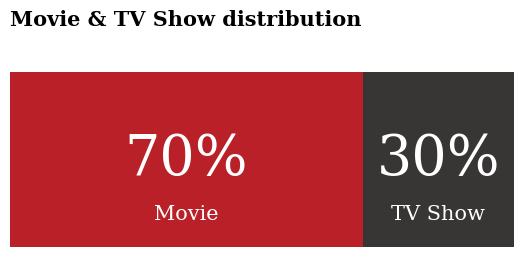

In [22]:
fig, ax = plt.subplots(1,1,figsize=(6.5, 2.5))

ax.barh(mf_ratio.index, mf_ratio['Movie'], 
        color='#b20710', alpha=0.9, label='Male')
ax.barh(mf_ratio.index, mf_ratio['TV Show'], left=mf_ratio['Movie'], 
        color='#221f1f', alpha=0.9, label='Female')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks([])
#ax.set_yticklabels(mf_ratio.index, fontfamily='serif', fontsize=11)


# movie percentage
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['Movie'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')

    ax.annotate("Movie", 
                   xy=(mf_ratio['Movie'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')
    
    
for i in mf_ratio.index:
    ax.annotate(f"{int(mf_ratio['TV Show'][i]*100)}%", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, i),
                   va = 'center', ha='center',fontsize=40, fontweight='light', fontfamily='serif',
                   color='white')
    ax.annotate("TV Show", 
                   xy=(mf_ratio['Movie'][i]+mf_ratio['TV Show'][i]/2, -0.25),
                   va = 'center', ha='center',fontsize=15, fontweight='light', fontfamily='serif',
                   color='white')






# Title & Subtitle
fig.text(0.125,1.03,'Movie & TV Show distribution', fontfamily='serif',fontsize=15, fontweight='bold')

for s in ['top', 'left', 'right', 'bottom']:
    ax.spines[s].set_visible(False)
    


#ax.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.06))

# Removing legend due to labelled plot
ax.legend().set_visible(False)
plt.show()

# TOP DIRECTORS ON NETFLIX (by number of Movie)

In [29]:
directors = df['director'].value_counts()
directors

Not Given                         2588
Rajiv Chilaka                       20
Alastair Fothergill                 18
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
                                  ... 
Matt D'Avella                        1
Parthiban                            1
Scott McAboy                         1
Raymie Muzquiz, Stu Livingston       1
Mozez Singh                          1
Name: director, Length: 4528, dtype: int64

In [60]:
px.bar(directors[1:11],
      x=directors[1:11],
      y=directors[1:11].index,
      color = directors[1:11].index,
        color_discrete_sequence = colors,
      text_auto = True,
      labels = dict(x='Number of movies', y='Directors'),
      orientation= 'h'
      )

# Country

In [37]:
countries = df['country'].value_counts()[:10]
countries

United States     3240
India             1057
United Kingdom     638
Pakistan           421
Not Given          287
Canada             271
Japan              259
South Korea        214
France             213
Spain              182
Name: country, dtype: int64

In [61]:
country_type = df.groupby(['country', 'type']).size().unstack(fill_value=0).reset_index()

country_type['Total'] = country_type['Movie'] + country_type['TV Show']

country_type = country_type[country_type['country'] != 'Not Given']

country_type = country_type.sort_values(by='Total', ascending=False)

colors = ['#B81D24', '#221F1F']

fig = px.bar(country_type.head(10), x='country', y=['Movie', 'TV Show'],
             labels={'value': 'Count', 'variable': 'Type'},
             title='Top 10 Countries and their Streamed Movies and TV Shows',
             barmode='group',  # This stacks the bars next to each other
             color_discrete_map={key: value for key, value in zip(['Movie', 'TV Show'], colors)})

fig.update_traces(marker=dict(line=dict(width=4)))

fig.show()

Increasing contents by year

In [62]:
iplot(px.line(shows_added_per_year,
    title='Number Of Shows Added per year',
    x = shows_added_per_year.index,
    y = shows_added_per_year,
    markers = True , line_shape='linear'
))

# Ratings

In [50]:
rating = df['rating'].value_counts()
rating.head(10)

TV-MA    3205
TV-14    2157
TV-PG     861
R         799
PG-13     490
TV-Y7     333
TV-Y      306
PG        287
TV-G      220
NR         79
Name: rating, dtype: int64

In [63]:
iplot(px.bar(rating,
    title="Shows Rating On Netflix",
    color = rating.index,
    orientation = 'h',
    height = 720,
    text_auto=True,
    labels =dict(index='Rating',value='Frequency'),
))

# Num of season

In [53]:
seasons = df[df['duration'].str.contains('Season')]
seasons_count = seasons['duration'].value_counts()
seasons_count

1 Season      1791
2 Seasons      421
3 Seasons      198
4 Seasons       94
5 Seasons       64
6 Seasons       33
7 Seasons       23
8 Seasons       17
9 Seasons        9
10 Seasons       6
15 Seasons       2
13 Seasons       2
12 Seasons       2
17 Seasons       1
11 Seasons       1
Name: duration, dtype: int64

In [64]:
iplot(px.bar(seasons_count,
    title="Season per TV Show",
    color = seasons_count.index,
    orientation = 'h',
    height = 720,
    text_auto=True,
    labels =dict(index='Seasons',value='Sum'),
))

# GENRES

In [55]:
categories = df['listed_in'].str.split(', ', expand=True)

categories = categories.melt(value_name='category').dropna()['category']

top_categories = categories.value_counts().head(10)

top_categories

International Movies        2752
Dramas                      2426
Comedies                    1674
International TV Shows      1349
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: category, dtype: int64

In [65]:
top_categories_df = pd.DataFrame({'Category': top_categories.index, 'Count': top_categories.values})

fig = px.bar(top_categories_df, x='Count', y='Category', orientation='h',
             title='Top 10 Popular Categories for Movies & TV Shows',
             labels={'Count': 'Number of Shows', 'Category': 'Category'},
             color=top_categories_df.index,
             text='Count')

fig.show()